In [138]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import pandas as pd

In [140]:
df=pd.read_csv("vitaldb.csv",sep=",")

In [141]:
df.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [142]:
null_col=[]
for i in df.columns:
  if(df[i].isnull().sum()>0):
    
    null_col.append(i)

In [143]:
temp=df[null_col].isnull().sum()


In [144]:
drop_c=[]
for i,j in zip(temp.index,temp.values):
  if(j>len(df)/5):
    drop_c.append(i)
drop_c.append("caseid")
drop_c.append("subjectid")

In [145]:
df.drop(drop_c,inplace=True,axis=1)
df.head()

,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,11542,-552,10848.0,1668,10368,-236220,627780,0,0,...,0,120,0.0,100,70,0,10,0,0,0
1,0,15741,-1039,14921.0,1721,14621,-221160,1506840,0,0,...,0,150,0.0,0,100,0,20,0,0,0
2,0,4394,-590,4210.0,1090,3010,-218640,40560,0,0,...,0,0,0.0,0,50,0,0,0,0,0
3,0,20990,-778,20222.0,2522,17822,-201120,576480,1,0,...,0,80,0.0,100,100,0,50,0,0,0
4,0,21531,-1009,22391.0,2591,20291,-67560,3734040,13,0,...,0,0,0.0,0,160,0,10,900,0,2100


In [146]:
df['recording_time']=(df['caseend']-df['casestart'])/360
df['anes_time']=-(df['anestart']-df['aneend'])/360
df['oper_time']=-(df['opstart']-df['opend'])/360


In [147]:
df.drop(['caseend','casestart','anestart','aneend','opstart','opend','adm','dis'],axis=1,inplace=True)

In [148]:
x=df

In [149]:
x

,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,...,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,recording_time,anes_time,oper_time
0,0,0,77.0,M,160.2,67.50,26.3,2.0,0,General surgery,...,100,70,0,10,0,0,0,32.061111,31.666667,24.166667
1,0,0,54.0,M,167.3,54.80,19.6,2.0,0,General surgery,...,0,100,0,20,0,0,0,43.725000,44.333333,35.833333
2,0,0,62.0,M,169.1,69.70,24.4,1.0,0,General surgery,...,0,50,0,0,0,0,0,12.205556,13.333333,5.333333
3,1,0,74.0,M,160.6,53.00,20.5,2.0,0,General surgery,...,100,100,0,50,0,0,0,58.305556,58.333333,42.500000
4,13,0,66.0,M,171.0,59.70,20.4,3.0,1,General surgery,...,0,160,0,10,900,0,2100,59.808333,65.000000,49.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,0,0,64.0,M,161.5,63.00,24.2,1.0,0,General surgery,...,0,90,0,20,0,0,0,42.355556,44.166667,33.333333
6384,0,0,69.0,M,159.3,62.30,24.6,2.0,0,General surgery,...,0,100,0,25,30,0,300,57.341667,59.833333,47.500000
6385,0,0,61.0,F,151.7,43.25,18.8,1.0,0,General surgery,...,0,130,0,10,0,0,0,54.030556,55.000000,40.833333
6386,0,0,24.0,F,155.7,55.50,22.9,1.0,0,General surgery,...,0,50,0,0,0,0,0,33.402778,37.166667,25.833333


In [150]:
x.dtypes

icu_days                 int64
death_inhosp             int64
age                    float64
sex                     object
height                 float64
weight                 float64
bmi                    float64
asa                    float64
emop                     int64
department              object
optype                  object
dx                      object
opname                  object
approach                object
position                object
ane_type                object
preop_htn                int64
preop_dm                 int64
preop_ecg               object
preop_pft               object
preop_hb               float64
preop_plt              float64
preop_pt               float64
preop_aptt             float64
preop_na               float64
preop_k                float64
preop_gluc             float64
preop_alb              float64
preop_ast              float64
preop_alt              float64
preop_bun              float64
preop_cr               float64
cormack 

Univariate and Multivariate Analysis

<ipython-input-151-8300c3c86a09>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['age'], hist=True, kde=True)


<Axes: xlabel='age', ylabel='Density'>

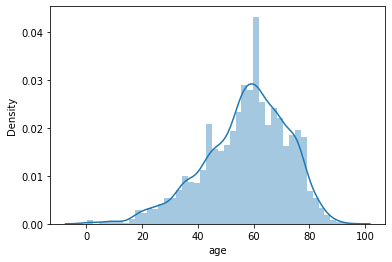

In [151]:
import seaborn as sns
sns.distplot(x['age'], hist=True, kde=True)

In [152]:
x['age'].isnull().sum()

0

The Variable looks normal therefore no preprocessing needed at this stage

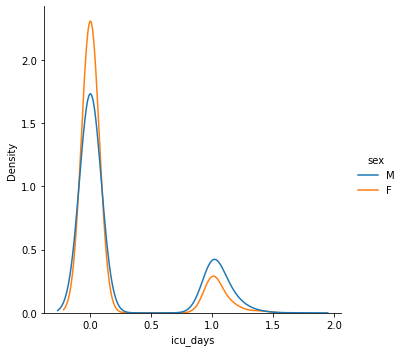

In [153]:
sns.displot(data=x, x=x["icu_days"]**0.1, hue="sex", kind="kde")

<Axes: xlabel='sex', ylabel='icu_days'>

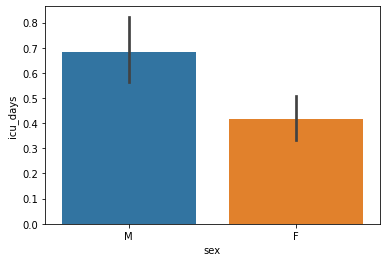

In [154]:
sns.barplot(x='sex',y='icu_days',data=x)

In [155]:
# Split the dataset into X and Y
from scipy import stats
X1 = x['sex']
Y1 = x['icu_days']

grouped_Y = [x.loc[x['sex'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 9.748123377035274
P-value: 0.001803079372685652
X is a statistically significant predictor of Y


In [156]:
x.sex.isnull().sum()

0

Gender is a important factor for prediction

In [157]:
x['asa'].value_counts()

2.0    3699
1.0    1792
3.0     703
4.0      48
6.0      13
Name: asa, dtype: int64

In [158]:
x['asa']=x['asa'].fillna(5.0)

<Axes: xlabel='asa', ylabel='icu_days'>

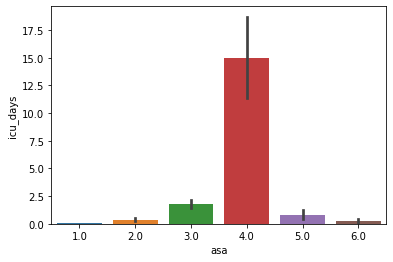

In [159]:
sns.barplot(x='asa',y='icu_days',data=x)

In [160]:
X1 = x['asa']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['asa'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2],grouped_Y[3],grouped_Y[4])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 44.39540771147573
P-value: 8.13916512510669e-37
X is a statistically significant predictor of Y


In [161]:
x.groupby('asa')['death_inhosp'].mean()

asa
1.0    0.005022
2.0    0.004596
3.0    0.024182
4.0    0.250000
5.0    0.015038
6.0    0.000000
Name: death_inhosp, dtype: float64

death_inhosp only shows if the patient died in Hospital, Not if they are already dead and taken to hospital.

In [162]:
x.drop(['death_inhosp'],axis=1,inplace=True)

We will keep ASA as it is important

In [163]:
x['department'].value_counts()

General surgery     4930
Thoracic surgery    1111
Gynecology           230
Urology              117
Name: department, dtype: int64

<Axes: xlabel='department', ylabel='icu_days'>

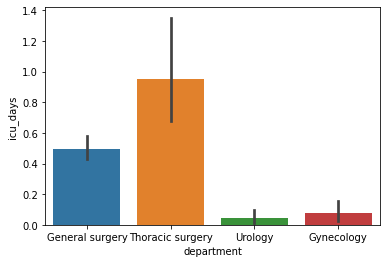

In [164]:
sns.barplot(x='department',y='icu_days',data=x)

In [165]:
X1 = x['department']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['department'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2],grouped_Y[3])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 7.867602141079531
P-value: 3.0845049226979406e-05
X is a statistically significant predictor of Y


In [166]:
x['department'].isnull().sum()

0

As we seen Department seems to be significant for predicting the stay in ICU

In [167]:
x['optype'].value_counts()

Colorectal          1350
Biliary/Pancreas     812
Others               799
Stomach              676
Major resection      584
Minor resection      553
Breast               434
Transplantation      403
Vascular             262
Hepatic              258
Thyroid              257
Name: optype, dtype: int64

<Axes: xlabel='optype', ylabel='icu_days'>

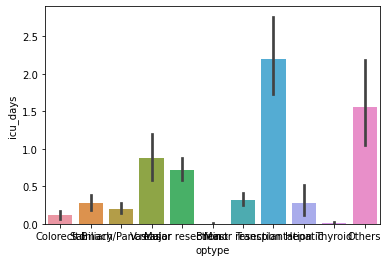

In [168]:
sns.barplot(x='optype',y='icu_days',data=x)

In [169]:
X1 = x['optype']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['optype'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2],grouped_Y[3],grouped_Y[4],grouped_Y[5],grouped_Y[6],grouped_Y[7],grouped_Y[8],grouped_Y[9],grouped_Y[10])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 23.09183761096519
P-value: 3.693921393620243e-43
X is a statistically significant predictor of Y


In [170]:
x.optype.isnull().sum()

0

Since  optype seems to be important as P value suggests

In [171]:
x['dx'].value_counts()

Early gastric cancer                                   252
Colon cancer, sigmoid                                  207
Rectal cancer                                          169
Lung cancer right                                      166
Hepatocellular carcinoma                               154
                                                      ... 
Aspergilloma                                             1
Undifferentiated pleomorphic sarcoma of upper limb       1
Hepatoblastoma                                           1
Keloid scar                                              1
Colon submucosal tumor, unknown behavior                 1
Name: dx, Length: 1038, dtype: int64

In [172]:
x.groupby('dx')['icu_days'].mean()

dx
Abdominal compartment syndrome              1.0
Abdominal distension                        0.0
Abdominal hernia                            0.0
Abdominal mass                              0.0
Abdominal mass                              0.0
                                           ... 
thymoma                                     1.0
thyroid nodule                              0.0
thyroid nodule                              0.0
varicose vein of lower extremities          0.0
varicose vein with non-specific symptoms    0.0
Name: icu_days, Length: 1038, dtype: float64

In [173]:
x.dx.isnull().sum()

0

This needs BioBERT feature word embeddings 

In [174]:
x['opname'].value_counts()

Cholecystectomy                     503
Distal gastrectomy                  342
Lung lobectomy                      332
Breast-conserving surgery           295
Anterior resection                  247
                                   ... 
Ovarian cancer staging operation      1
Modified radical hysterectomy         1
Diverticulectomy                      1
Removal of complicated graft          1
Thyroidectomy                         1
Name: opname, Length: 241, dtype: int64

In [175]:
x.opname.isnull().sum()

0

Opname needs to be word embedded to convert text to numerical features

In [176]:
x['approach'].value_counts()

Open           3365
Videoscopic    2754
Robotic         269
Name: approach, dtype: int64

<Axes: xlabel='approach', ylabel='icu_days'>

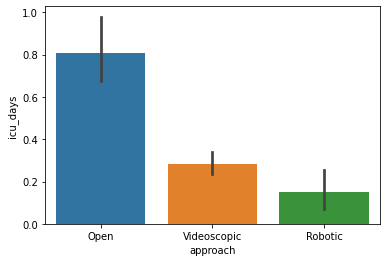

In [177]:
sns.barplot(x='approach',y='icu_days',data=x)

In [178]:
X1 = x['approach']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['approach'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 19.9710166441595
P-value: 2.257945415534455e-09
X is a statistically significant predictor of Y


In [179]:
x.approach.isnull().sum()

0

Approach feature is significant for prediction

In [180]:
x['emop'].value_counts()

0    5606
1     782
Name: emop, dtype: int64

<Axes: xlabel='emop', ylabel='icu_days'>

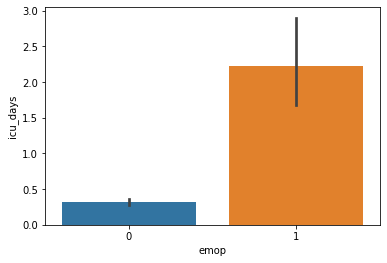

In [181]:
sns.barplot(x='emop',y='icu_days',data=x)

In [182]:
x.emop.isnull().sum()

0

Clearly shows the difference and useful for prediction

In [183]:
x['position'].value_counts()

Supine                     3883
Lithotomy                   994
Left lateral decubitus      556
Right lateral decubitus     493
Prone                       148
Reverse Trendelenburg        74
Trendelenburg                35
Sitting                       5
Left kidney                   4
Right kidney                  2
Name: position, dtype: int64

In [184]:
x.groupby('position')['icu_days'].mean()

position
Left kidney                0.000000
Left lateral decubitus     0.721223
Lithotomy                  0.116700
Prone                      0.094595
Reverse Trendelenburg      0.297297
Right kidney               0.000000
Right lateral decubitus    0.833671
Sitting                    0.000000
Supine                     0.638681
Trendelenburg              0.000000
Name: icu_days, dtype: float64

In [185]:
x.position.isnull().sum()

194

In [186]:
x['icu_days'].mean()

0.5527551659361303

In [187]:
x["position"]=x["position"].fillna("Supine")

Since the average value of predictor is nearly same

<Axes: xlabel='position', ylabel='icu_days'>

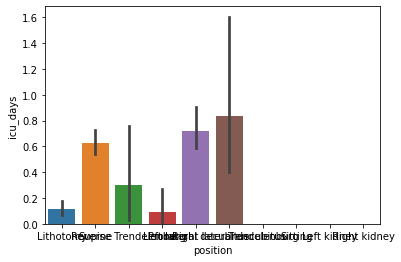

In [188]:
sns.barplot(x='position',y='icu_days',data=x)

In [189]:
X1 = x['position']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['position'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2],grouped_Y[3],grouped_Y[4],grouped_Y[5],grouped_Y[6],grouped_Y[7],grouped_Y[8],grouped_Y[9])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 3.0406713620626062
P-value: 0.001236845525913384
X is a statistically significant predictor of Y


Hypothesis test shows that the variables show difference in mean

In [190]:
x['ane_type'].value_counts()

General            6043
Spinal              273
Sedationalgesia      72
Name: ane_type, dtype: int64

In [191]:
x.ane_type.isnull().sum()

0

<Axes: xlabel='ane_type', ylabel='icu_days'>

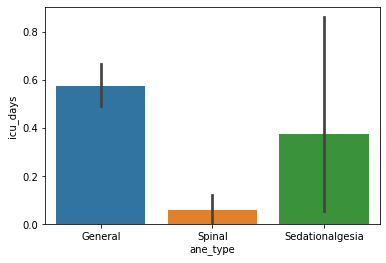

In [192]:
sns.barplot(x='ane_type',y='icu_days',data=x)

In [193]:
X1 = x['ane_type']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['ane_type'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 3.11729671599621
P-value: 0.04434409282742668
X is a statistically significant predictor of Y


In [194]:
x['preop_ecg'].value_counts()

Normal Sinus Rhythm                                                                         6306
1st degree A-V block                                                                          12
Right bundle branch block                                                                     10
Premature ventricular complexes                                                               10
Incomplete right bundle branch block                                                           9
Atrial fibrillation                                                                            8
Premature atrial complexes                                                                     7
Left anterior fascicular block                                                                 3
Atrial fibrillation with slow ventricular response                                             2
Atrial fibrillation with rapid ventricular response                                            2
Premature supraventricular com

Preop_ecg needs NLP feature word embedding

In [195]:
x['preop_pft'].value_counts()

Normal                       5348
Mild obstructive              488
Mild restrictive              261
Moderate obstructive          114
Mixed or pure obstructive     100
Severe restrictive             36
Moderate restrictive           29
Borderline obstructive          8
Severe obstructive              4
Name: preop_pft, dtype: int64

In [196]:
x.groupby(['preop_pft'])['icu_days'].mean()

preop_pft
Borderline obstructive       1.125000
Mild obstructive             0.311475
Mild restrictive             1.455939
Mixed or pure obstructive    1.090000
Moderate obstructive         0.456140
Moderate restrictive         1.620690
Normal                       0.504301
Severe obstructive           0.750000
Severe restrictive           2.277778
Name: icu_days, dtype: float64

<Axes: xlabel='preop_pft', ylabel='icu_days'>

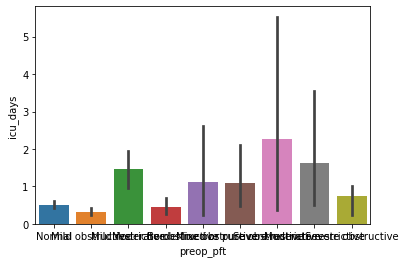

In [197]:
sns.barplot(x='preop_pft',y='icu_days',data=x)

In [198]:
_dict = {'Normal': 0, 'Mild obstructive': 1, 'Mild restrictive': 1, 'Borderline obstructive': 2,
         'Mixed or pure obstructive':2,'Moderate restrictive':3,"Moderate obstructive":3,"Severe restrictive":4,"Severe obstructive":4}

# replace values in the 'color' column based on the dictionary
x['preop_pft'] = x['preop_pft'].map(_dict)

In [199]:
x.groupby(['preop_pft'])['icu_days'].mean()

preop_pft
0    0.504301
1    0.710280
2    1.092593
3    0.692308
4    2.125000
Name: icu_days, dtype: float64

Clearly shows 

In [200]:
x['airway'].value_counts()

Oral            5959
Nasal              7
Tracheostomy       7
Name: airway, dtype: int64

In [201]:
x.drop(['airway'],axis=1,inplace=True)

Since airway is very imbalanced, it better to drop

In [202]:
x['iv1'].value_counts()

Left forearm     4065
Right forearm    1787
Left hand         188
Right hand        143
Left foot          34
Right etc          26
Right foot         20
Left etc           18
Left leg           15
Right leg          12
Right               5
Name: iv1, dtype: int64

In [203]:
x.drop(['iv1'],axis=1,inplace=True)

IV1 shows th IV usage location, It does not add any value to ICU days

In [204]:
x.cormack.isnull().sum()

835

In [205]:
x.cormack.value_counts()

I       5178
II       235
IIIa      91
IIIb      35
IV        14
Name: cormack, dtype: int64

<Axes: xlabel='cormack', ylabel='icu_days'>

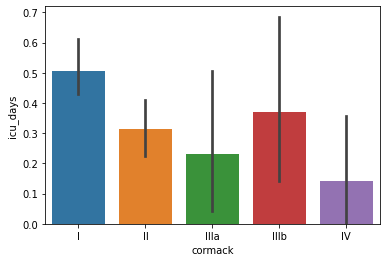

In [206]:
sns.barplot(x='cormack',y='icu_days',data=x)

In [207]:
x['cormack']=x['cormack'].fillna("I")

<Axes: xlabel='cormack', ylabel='icu_days'>

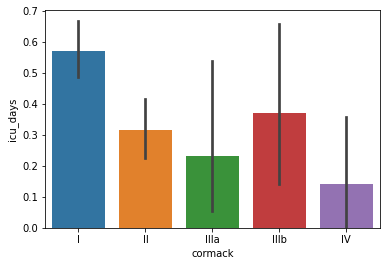

In [208]:
sns.barplot(x='cormack',y='icu_days',data=x)

In [209]:
X1 = x['cormack']
Y1 = x['icu_days']
grouped_Y = [x.loc[x['cormack'] == i, 'icu_days'] for i in X1.unique()]

  # Perform an ANOVA test between X and Y
F_statistic, p_value = stats.f_oneway(grouped_Y[0],grouped_Y[1],grouped_Y[2],grouped_Y[3],grouped_Y[4])

  # Print the results of the hypothesis test
print('F-statistic:', F_statistic)
print('P-value:', p_value)

  # Check if the p-value is less than 0.05
if p_value < 0.05:
      print('X is a statistically significant predictor of Y')
else:
      print('X is not a statistically significant predictor of Y')


F-statistic: 0.5968860694287018
P-value: 0.6648924912783045
X is not a statistically significant predictor of Y


In [210]:
x.drop(['cormack'],axis=1,inplace=True)

In [211]:
x.isnull().sum()

icu_days                 0
age                      0
sex                      0
height                   0
weight                   0
bmi                      0
asa                      0
emop                     0
department               0
optype                   0
dx                       0
opname                   0
approach                 0
position                 0
ane_type                 0
preop_htn                0
preop_dm                 0
preop_ecg                0
preop_pft                0
preop_hb               341
preop_plt              341
preop_pt               390
preop_aptt             402
preop_na               623
preop_k                621
preop_gluc             378
preop_alb              372
preop_ast              366
preop_alt              364
preop_bun              365
preop_cr               372
intraop_rbc              0
intraop_ffp              0
intraop_crystalloid    408
intraop_colloid          0
intraop_ppf              0
intraop_mdz              0
i

In [212]:
x['preop_hb'].describe()          

count    6047.00000
mean       12.83319
std         1.98949
min         3.50000
25%        11.60000
50%        13.00000
75%        14.20000
max        20.20000
Name: preop_hb, dtype: float64

In [213]:
col=['preop_hb', 'preop_plt', 'preop_pt', 'preop_aptt', 'preop_na',
       'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt',
       'preop_bun', 'preop_cr', 'intraop_rbc', 'intraop_ffp',
       'intraop_crystalloid']


In [214]:
for i in col:
  print("for column ",i )
  print((x[i].describe()['mean']-x[i].describe()['50%'])/(x[i].describe()['min']-x[i].describe()['max']))


for column  preop_hb
0.009988622061318068
for column  preop_plt
-0.00559316917565947
for column  preop_pt
0.0037334667111259515
for column  preop_aptt
-0.0020592078294732457
for column  preop_na
-0.000676051326528237
for column  preop_k
0.0006083708299412384
for column  preop_gluc
-0.026288479699461395
for column  preop_alb
0.02898299569941157
for column  preop_ast
-0.002479279854780213
for column  preop_alt
-0.004685520006488043
for column  preop_bun
-0.017426478070621757
for column  preop_cr
-0.011791440172080305
for column  intraop_rbc
-0.0005880165936130244
for column  intraop_ffp
-0.0024776022349597806
for column  intraop_crystalloid
-0.015148750671568534


In [215]:
for i in col:
  x[i]=x[i].fillna(x[i].mean())

The mean and median are nearly same therefore it is better to use mean as consideraton to fill na values

In [216]:
x = x.loc[x["icu_days"] <= 150 ]

NLP Processing and dropping the columns

In [220]:
x['nlp']=x['dx']+" "+ x['opname']+" "+x['preop_ecg']

<ipython-input-220-b55bd3b4b2cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nlp']=x['dx']+" "+ x['opname']+" "+x['preop_ecg']


In [221]:
x.drop(['dx','opname','preop_ecg'],axis=1,inplace=True)

<ipython-input-221-48c1e36d9e02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['dx','opname','preop_ecg'],axis=1,inplace=True)


Stop word removal and text preprocessing

In [222]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
x['nlp'] = x['nlp'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop)]))
x['nlp']=x['nlp'].str.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-222-f9a2278acf6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nlp'] = x['nlp'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop)]))
<ipython-input-222-f9a2278acf6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nlp']=x['nlp'].str.lower()


Finding categorical and continous columns

In [223]:
import numpy
categorical=[]
cont=[]
for i,j in zip(x.dtypes.index,x.dtypes):
  if(j==numpy.dtype('O')):
    categorical.append(i)
  else:
    cont.append(i)
categorical

['sex', 'department', 'optype', 'approach', 'position', 'ane_type', 'nlp']

Using BioBERT model for understanding the medical terms and feature extraction

In [226]:
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
temp=np.unique(x['nlp'])
opname_dict={}

# Load the pre-trained BioBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")
for document in tqdm(temp):
  document_tokens = tokenizer(document, return_tensors="pt")

  # Pass the tokenized data through the BioBERT model
  with torch.no_grad():
      model_output = model(**document_tokens)

  # Get the final hidden states of the BioBERT model as the document embeddings
  opname_dict[document]=model_output.last_hidden_state.mean(dim=1).tolist()[0]


100%|██████████| 1670/1670 [03:49<00:00,  7.28it/s]


In [227]:
x['nlp'] = x['nlp'].map(opname_dict)

<ipython-input-227-37af09a611ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['nlp'] = x['nlp'].map(opname_dict)


Feature extraction and PCA to reduce the size

In [229]:
from sklearn.decomposition import PCA
ar=np.array(x['nlp'].tolist())

In [230]:
pca = PCA(0.9)

In [231]:
temp=pca.fit_transform(ar)

In [232]:
temp.shape

(6387, 54)

SToring the PCA components as feature back in dataframe

In [233]:
c=[]
for i in range(54):
  c.append("I"+str(i))



In [234]:
x[c]=temp

<ipython-input-234-75759d0f9db3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c]=temp
<ipython-input-234-75759d0f9db3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[c]=temp
<ipython-input-234-75759d0f9db3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[

In [235]:
categorical

['sex', 'department', 'optype', 'approach', 'position', 'ane_type', 'nlp']

In [236]:
temp={"M":0,"F":1}
x['sex']=x['sex'].map(temp)

<ipython-input-236-1120153bb6c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['sex']=x['sex'].map(temp)


One hot encoding the categorical columns

In [237]:

cols_to_transform=["department","optype",'ane_type','position','approach']
dummies = pd.get_dummies(x[cols_to_transform])
x = pd.concat([x, dummies], axis=1)

# drop the original categorical columns
x.drop(cols_to_transform, axis=1, inplace=True)


Saving the data since it takes time to reload in case of crash

In [238]:
x.to_csv("preprocessed.csv",index=True)

In [239]:
x=pd.read_csv("/content/preprocessed.csv")

In [240]:
x.drop(['Unnamed: 0'],axis=1,inplace=True)

Seperating Features and prediction variable

In [241]:
y=x['icu_days']
x=x.drop(['icu_days'],axis=1,inplace=False)


In [242]:
x.drop(['nlp'],axis=1,inplace=True)
c=x.columns

Preprocessing continuous columns

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[c]=scaler.fit_transform(x[c])

Finding correlation to remove features that are correlated

In [245]:
import numpy as np

# Create correlation matrix
corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]



In [246]:
to_drop

['bmi',
 'preop_alt',
 'preop_cr',
 'intraop_ca',
 'oper_time',
 'department_Thoracic surgery',
 'optype_Colorectal',
 'ane_type_Spinal',
 'approach_Videoscopic']

In [247]:
x.drop(to_drop,axis=1,inplace=True)

Reducing the size of dataframe using PCA

In [249]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x=pca.fit_transform(x)

Splitting for training and testing model

In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 0)

Applying different model and using r^2 and RMSE values

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the linear regression model on the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)
1
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)

Root Mean Squared Error: 2.926083633356871
R^2: 0.19842437017342685
Adjusted R^2: 0.1660269196849996


In [252]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the SVR model on the training data
reg = SVR().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Root Mean Squared Error: 3.0359490213073763
R^2: 0.13710096266087335
Adjusted R^2: 0.1022249911386921


In [253]:
!pip install xgboost

import xgboost as xgb
# Train the XGBoost model on the training data
reg = xgb.XGBRegressor().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Root Mean Squared Error: 2.7216821067904213
R^2: 0.3065010127030152
Adjusted R^2: 0.27847171856193764


In [254]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model on the training data
reg = RandomForestRegressor().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Root Mean Squared Error: 2.8562028863492843
R^2: 0.2362536594098783
Adjusted R^2: 0.20538516324521883


In [255]:
!pip install catboost

import catboost as cb

# Train the CatBoost model on the training data
reg = cb.CatBoostRegressor().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.052441
0:	learn: 2.2741662	total: 36.8ms	remaining: 36.8s
1:	learn: 2.2465616	total: 71.2ms	remaining: 35.5s
2:	learn: 2.2153673	total: 95.1ms	remaining: 31.6s
3:	learn: 2.1846482	total: 124ms	remaining: 30.9s
4:	learn: 2.1672849	total: 149ms	remaining: 29.7s
5:	learn: 2.1396989	total: 173ms	remaining: 28.7s
6:	learn: 2.1237559	total: 237ms	remaining: 33.6s
7:	learn: 2.1058342	total: 268ms	remaining: 33.3s
8:	learn: 2.0866437	total: 300ms	remaining: 33s
9:	learn: 2.0695609	total: 337ms	remaining: 33.4s
10:	learn: 2.0584767	total: 370ms	remaining: 33.2s
11:	learn: 2.0315441	total: 402ms	remaining: 33.1s
12:	learn: 2.0099838	total: 434ms	remaining: 33s
13:	learn: 1.9914118	total: 467ms	remaining: 32.9s
14:	learn: 1.9768305	total: 499ms	remaining: 32.7s
15:	learn: 1.9591805	total: 532ms	remaining: 32.7s
16:	learn: 1.9468785	total: 566ms	remaining: 32.7s
17:	learn: 1.93

In [256]:
from sklearn.linear_model import Lasso

# Train the Lasso model on the training data
reg = Lasso().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Root Mean Squared Error: 3.272375005387262
R^2: -0.0025295180262292494
Adjusted R^2: -0.04304896399599856


In [257]:
from sklearn.linear_model import Ridge

# Train the Ridge model on the training data
reg = Ridge().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Root Mean Squared Error: 2.926760339827594
R^2: 0.1980535713811259
Adjusted R^2: 0.16564113424007632


In [258]:
from sklearn.linear_model import ElasticNet

# Train the ElasticNet model on the training data
reg = ElasticNet().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


Root Mean Squared Error: 3.272375005387262
R^2: -0.0025295180262292494
Adjusted R^2: -0.04304896399599856


In [259]:
import tensorflow as tf
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='sigmoid'),tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)


50/50 [==============================] - 0s 3ms/step
Root Mean Squared Error: 2.4868018837547727
R^2: 0.42103353344975647
Adjusted R^2: 0.39763332424107645


Testing if the average value prediction is better than predicted value

In [260]:
rmse = np.sqrt(mean_squared_error(y_test, [y_test.mean()]*len(y_test)))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, [y_test.mean()]*len(y_test))
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)

Root Mean Squared Error: 3.2682440749023636
R^2: 0.0
Adjusted R^2: -0.04041720990873543


In [261]:
rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()]*len(y_test)))
print("Root Mean Squared Error:", rmse)

# Calculate the R^2 score
r2 = r2_score(y_test, [y_test.mean()]*len(y_test))
print("R^2:", r2)

# Calculate the adjusted R^2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R^2:", adjusted_r2)

Root Mean Squared Error: 3.272375005387262
R^2: 0.0
Adjusted R^2: -0.04041720990873543
